In [17]:
from tensorflow.keras.layers import Input, DepthwiseConv2D, \
     Conv2D, BatchNormalization, ReLU, AvgPool2D, Flatten, Dense, Concatenate,GlobalAvgPool2D, Add

from tensorflow.keras import Model

import numpy as np

In [18]:
def mobilenet_block(x, filters, strides):
    x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(filters=filters, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

In [19]:
INPUT_SHAPE = 224, 224, 3

input = Input(INPUT_SHAPE)

In [65]:
x_first = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(input)
x_first = BatchNormalization()(x_first)
x_first = ReLU()(x_first)

x = mobilenet_block(x_first, filters=64, strides=1)

x = Add()([x_first, x])

x_second = mobilenet_block(x, filters=128, strides=2)

x = mobilenet_block(x_second, filters=128, strides=1)

x = Add()([x_second, x])

x = GlobalAvgPool2D()(x)

x = Dense(100, activation="relu")(x)

output = Dense(units=10, activation='softmax')(x)


In [49]:
model = Model(inputs=input, outputs=output)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 112, 112, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_63 (BatchNo (None, 112, 112, 64) 256         conv2d_35[0][0]                  
__________________________________________________________________________________________________
re_lu_63 (ReLU)                 (None, 112, 112, 64) 0           batch_normalization_63[0][0]     
______________________________________________________________________________________

In [22]:
import food_mnist 
from keras.utils.np_utils import to_categorical

(x_train, y_train), (x_test, y_test) = food_mnist.load_data()
labels_names = food_mnist.labels()

In [23]:
x_train = x_train/255.
x_test = x_test/255.

y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [47]:
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 3750
number of test examples = 1250
X_train shape: (3750, 224, 224, 3)
Y_train shape: (3750, 10)
X_test shape: (1250, 224, 224, 3)
Y_test shape: (1250, 10)


In [66]:
history = model.fit(x_train, y_train,
              epochs=5)

Epoch 1/5
118/118 [==============================] - 153s 1s/step - loss: 1.5194 - accuracy: 0.4512
Epoch 2/5
118/118 [==============================] - 163s 1s/step - loss: 1.4853 - accuracy: 0.4781
Epoch 3/5
118/118 [==============================] - 176s 1s/step - loss: 1.4274 - accuracy: 0.4915
Epoch 4/5
118/118 [==============================] - 166s 1s/step - loss: 1.3932 - accuracy: 0.5077
Epoch 5/5
118/118 [==============================] - 167s 1s/step - loss: 1.3816 - accuracy: 0.5067


In [67]:
ypred = model.predict(x_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data:', total, '\nAccurately-predicted-data:', accurate, '\nWrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 1250 
Accurately-predicted-data: 561 
Wrongly-predicted-data:  689
Accuracy: 44.88 %


In [68]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

40/40 - 15s - loss: 1.6493 - accuracy: 0.4488
Test loss: 1.649289846420288
Test accuracy: 0.4487999975681305


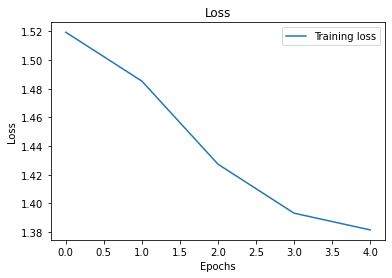

In [70]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = np.arange(0,5)
plt.plot(epochs, loss, label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

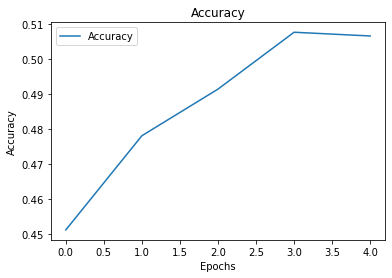

In [71]:
accuracy = history.history['accuracy']
epochs = np.arange(0,5)
plt.plot(epochs, accuracy, label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()